In [6]:
import sys
from sklearn import svm
from sklearn import metrics
from mlpath import mlquest as mlq
import numpy as np
sys.path.append('../../')
from DataPreparation.Ingestion import read_data, visualize_data
from DataPreparation.Preprocessing import preprocess_data
from FeatureExtraction.LBP.LBP import apply_LBP

In [7]:
mlq.start_quest('LBP-SVM')

/Users/essam/Documents/GitHub/MLPath/mlpath/mlquest/mlquest.py:66: UserWarning: Attempting to start a run while another one is active may cause data overwrite
  if mlquest.active == True: warnings.warn("Attempting to start a run while another one is active may cause data overwrite")


#### Ingestion

100%|██████████| 4/4 [00:00<00:00, 115.48it/s]


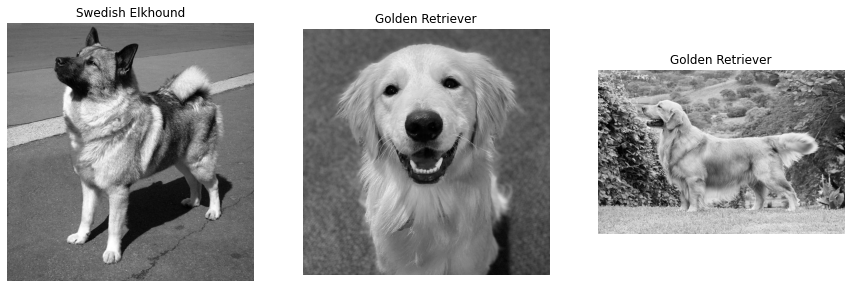

In [8]:
x_train_i, x_val_i, y_train_i, y_val_i = read_data()
visualize_data(x_train_i, y_train_i)

#### Preprocessing

In [9]:
x_train_p, x_val_p = preprocess_data(x_train_i, x_val_i)

#### Feature Extraction: Fractal Features

In [10]:
x_train_f, x_val_f = mlq.l(apply_LBP)(x_train_p, x_val_p, P=12, R=3)

#### Initiating the Model

In [11]:
model = mlq.l(svm.SVC)(kernel='linear', C=12.2, gamma=0.01, degree=3)

#### Training the model

In [12]:
model.fit(x_train_f, y_train_i)

SVC(C=12.2, gamma=0.01, kernel='linear')

#### Validate the model

In [13]:
Micro_F1 = metrics.f1_score(y_val_i, model.predict(x_val_f), average='micro').item()
mlq.log_metrics(Micro_F1)

In [14]:
mlq.end_quest()

#### Show Logs

In [15]:
mlq.show_logs(quest_name='LBP-SVM', last_k=10)